In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

%matplotlib inline

In [3]:
# Importing the groundwater measurement data in Pickle format
df_ms = pd.read_pickle("../data/processed/grundwasserdaten-NRW/GW-Messtellen.pkl")
df_ms_ws_input = pd.read_pickle("../data/processed/grundwasserdaten-NRW/GW-MessWasserstellenMerge.pkl")

In [4]:
# Providing the input DataFrame
df_mess_id_relevant = df_ms[df_ms["messstelle_id"].isin(df_ms_ws_input.loc[:, 'messstelle_id'].unique().tolist())]

jahre = sorted(df_ms_ws_input['wwj'].unique().tolist())
df_mess_id_relevant.loc[:, jahre] = np.nan

In [5]:
groups = df_ms_ws_input.groupby('messstelle_id')

for mess_id in df_ms_ws_input.loc[:, 'messstelle_id'].unique().tolist():
    df_mess_id = groups.get_group(mess_id)
    
    s = (
        df_mess_id
        .groupby('wwj')['wasserstd_m']
        .mean()
        .reindex(jahre)
        )

    df_mess_id_relevant.loc[df_mess_id_relevant['messstelle_id'] == mess_id, jahre] = s.values

In [6]:
df_mess_id_relevant.head()

,messstelle_id,name,e32,n32,turnus_wasserstand,freigabe_wstd,freigabe_chemie,freigabe_lage,messstellenart,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,070283916,LGD BN KOTTENF. 3,362354,5615873,monatlich,ja,ja,ja,GW-Messstelle,157.968262,157.942505,157.636154,157.597153,157.759216,158.256668,158.860764,158.398453,158.025009,157.676666
3,010445730,60BP010505,2911XX,56692XX,vierzehntäglich,ja,nein,nein,GW-Messstelle,NaN,NaN,30.624388,30.601395,30.473974,30.436245,29.735682,29.705078,29.631495,29.627205
4,010445791,60BP010701,2908XX,56657XX,vierzehntäglich,ja,nein,nein,GW-Messstelle,30.927084,31.116364,30.612633,30.871954,30.810970,30.860708,31.071995,30.650002,30.614887,30.416910
6,010446722,60GP012301,2920XX,56453XX,monatlich,ja,nein,nein,GW-Messstelle,81.496254,81.388641,81.072189,80.965340,80.842194,NaN,NaN,81.446419,81.499199,81.437012
7,100151115,WE 33 WEHE,4787XX,58085XX,monatlich,ja,nein,nein,GW-Messstelle,39.873333,39.723331,39.487499,39.514164,39.598331,39.764999,40.063335,39.716667,39.887501,39.774998


In [7]:
df_mess_id_relevant.isna().sum()

messstelle_id            0
name                     0
e32                      0
n32                      0
turnus_wasserstand       0
freigabe_wstd            0
freigabe_chemie          0
freigabe_lage            0
messstellenart           0
2010                   925
2011                   887
2012                   965
2013                   943
2014                   847
2015                   724
2016                   706
2017                   752
2018                   836
2019                  1114
dtype: int64

In [8]:
df_mess_id_relevant.shape

(11348, 19)

In [17]:
df_mess_id_relevant.loc[:, 'trend'] = df_mess_id_relevant.loc[:, 2019] - df_mess_id_relevant.loc[:, 2010]

In [10]:
# df_mess_id_relevant.loc[:, jahre].mean().plot()
# df_mess_id_relevant[jahre].quantile([0.1, 0.5, 0.9])
df_mess_id_relevant['trend'].describe()

count    9442.000000
mean       -0.592664
std         2.430900
min      -177.926071
25%        -0.752180
50%        -0.470001
75%        -0.220001
max        63.013733
Name: trend, dtype: float64

In [18]:
df_mess_id_relevant.loc[:, "trend_class"] = pd.cut(
    df_mess_id_relevant.loc[:, "trend"],
    bins=[-13, -5, -2, -1, 1, 2, 5, 13],
    labels=[1, 2, 3, 4, 5, 6, 7],
    include_lowest=True
)

In [12]:
df_mess_id_relevant.head()

,messstelle_id,name,e32,n32,turnus_wasserstand,freigabe_wstd,freigabe_chemie,freigabe_lage,messstellenart,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,trend,trend_class
2,070283916,LGD BN KOTTENF. 3,362354,5615873,monatlich,ja,ja,ja,GW-Messstelle,157.968262,...,157.636154,157.597153,157.759216,158.256668,158.860764,158.398453,158.025009,157.676666,-0.291595,4
3,010445730,60BP010505,2911XX,56692XX,vierzehntäglich,ja,nein,nein,GW-Messstelle,NaN,...,30.624388,30.601395,30.473974,30.436245,29.735682,29.705078,29.631495,29.627205,NaN,NaN
4,010445791,60BP010701,2908XX,56657XX,vierzehntäglich,ja,nein,nein,GW-Messstelle,30.927084,...,30.612633,30.871954,30.810970,30.860708,31.071995,30.650002,30.614887,30.416910,-0.510174,4
6,010446722,60GP012301,2920XX,56453XX,monatlich,ja,nein,nein,GW-Messstelle,81.496254,...,81.072189,80.965340,80.842194,NaN,NaN,81.446419,81.499199,81.437012,-0.059242,4
7,100151115,WE 33 WEHE,4787XX,58085XX,monatlich,ja,nein,nein,GW-Messstelle,39.873333,...,39.487499,39.514164,39.598331,39.764999,40.063335,39.716667,39.887501,39.774998,-0.098335,4


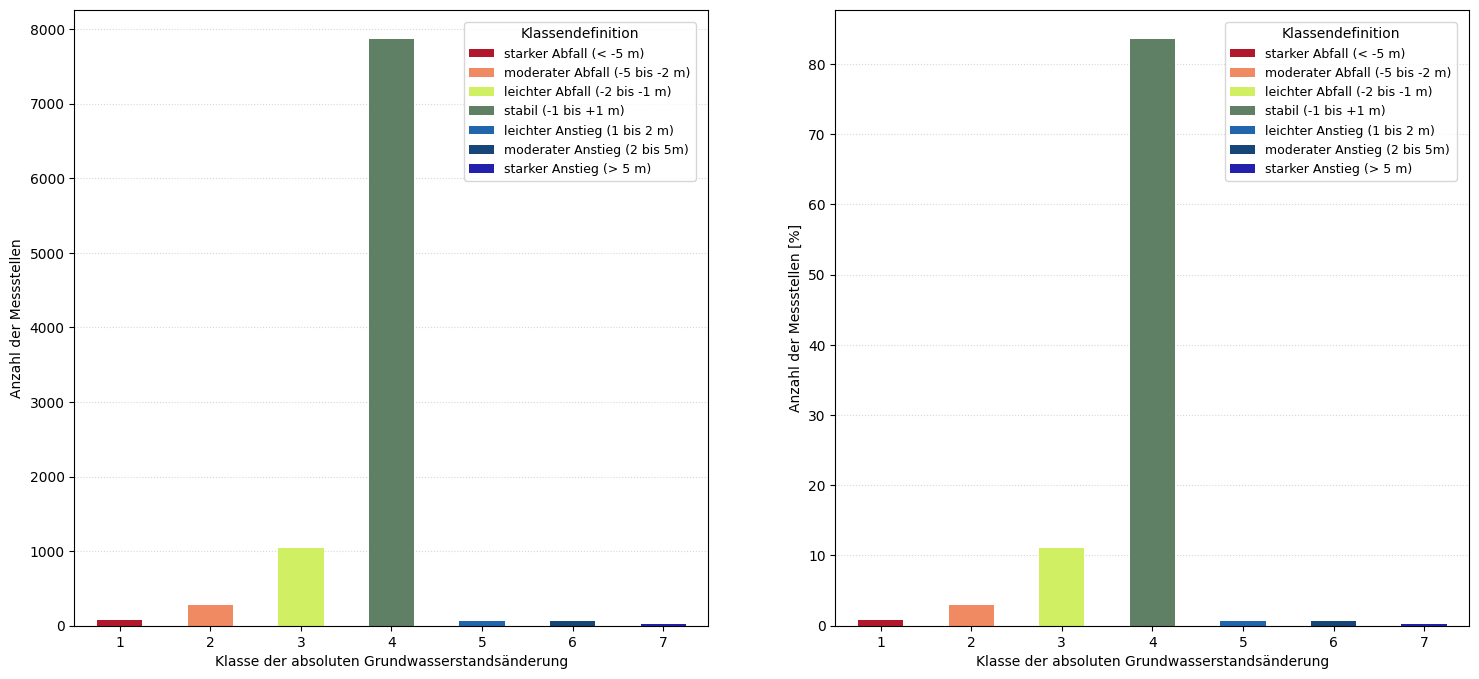

In [13]:
farbklassen = {
    1: {"farbe": "#b2182b", "label": "starker Abfall (< -5 m)"},
    2: {"farbe": "#ef8a62", "label": "moderater Abfall (-5 bis -2 m)"},
    3: {"farbe": "#d0ef62", "label": "leichter Abfall (-2 bis -1 m)"},
    4: {"farbe": "#608066", "label": "stabil (-1 bis +1 m)"},
    5: {"farbe": "#2166ac", "label": "leichter Anstieg (1 bis 2 m)"},
    6: {"farbe": "#154677", "label": "moderater Anstieg (2 bis 5m)"},
    7: {"farbe": "#2321ac", "label": "starker Anstieg (> 5 m)"},
}

counts = (
    df_mess_id_relevant["trend_class"]
    .astype("Int64")
    .value_counts()
    .reindex(farbklassen.keys(), fill_value=0)
)

farben_liste = [farbklassen[k]["farbe"] for k in counts.index]

fig, ax = plt.subplots(figsize=[18, 8], nrows=1, ncols=2)

df_mess_id_relevant.loc[:,'trend_class'].value_counts(normalize=False).sort_index().plot(kind='bar', ax=ax[0], color=farben_liste)
df_mess_id_relevant.loc[:,'trend_class'].value_counts(normalize=True).sort_index().mul(100).plot(kind='bar', ax=ax[1], color=farben_liste)

for axes in range(2):

    handles = [
        Patch(
            facecolor=patch.get_facecolor(),
            label=farbklassen[i]['label']
        )
        for i, patch in zip(counts.index, ax[axes].patches)
        ]
    
    ax[axes].grid(True, linestyle=':', alpha=0.5, axis='y')
    ax[axes].set_axisbelow(True)
    ax[axes].set_xlabel('Klasse der absoluten Grundwasserstandsänderung', fontsize=10)
    ax[axes].set_xticklabels(['1', '2', '3', '4', '5', '6', '7'], rotation=0);

    if axes == 0:
        ax[axes].set_ylabel('Anzahl der Messstellen', fontsize=10)
    if axes == 1:
        ax[axes].set_ylabel('Anzahl der Messstellen [%]', fontsize=10)

    ax[axes].legend(
        handles=handles,
        title="Klassendefinition",
        loc="upper right",
        fontsize=9,
        bbox_to_anchor=(0.98, 0.98),
        borderaxespad=0
    )

<Axes: >

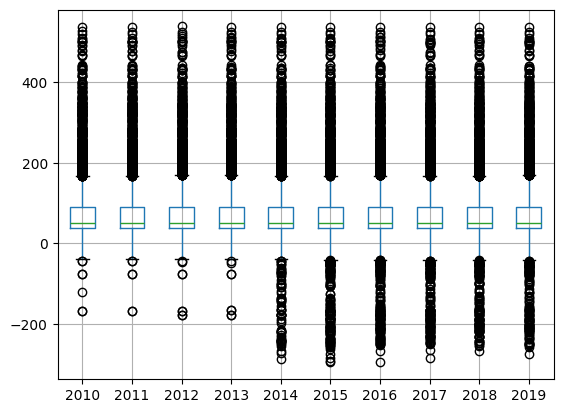

In [14]:
# df_year = df_mess_id_relevant.groupby('wwj')[jahre].mean()
# df_year.plot()

df_mess_id_relevant[jahre].boxplot()

# Aufbereitung der Ergebnisse für QGIS

In [15]:
for index in df_mess_id_relevant.index:
    if df_mess_id_relevant.loc[index, 'freigabe_lage'] == 'nein':
        df_mess_id_relevant.loc[index, 'e32'] = df_mess_id_relevant.loc[index, 'e32'].replace("XX", "50")
        df_mess_id_relevant.loc[index, 'n32'] = df_mess_id_relevant.loc[index, 'n32'].replace("XX", "50")
        
df_mess_id_relevant.head()

,messstelle_id,name,e32,n32,turnus_wasserstand,freigabe_wstd,freigabe_chemie,freigabe_lage,messstellenart,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,trend,trend_class
2,070283916,LGD BN KOTTENF. 3,362354,5615873,monatlich,ja,ja,ja,GW-Messstelle,157.968262,...,157.636154,157.597153,157.759216,158.256668,158.860764,158.398453,158.025009,157.676666,-0.291595,4
3,010445730,60BP010505,291150,5669250,vierzehntäglich,ja,nein,nein,GW-Messstelle,NaN,...,30.624388,30.601395,30.473974,30.436245,29.735682,29.705078,29.631495,29.627205,NaN,NaN
4,010445791,60BP010701,290850,5665750,vierzehntäglich,ja,nein,nein,GW-Messstelle,30.927084,...,30.612633,30.871954,30.810970,30.860708,31.071995,30.650002,30.614887,30.416910,-0.510174,4
6,010446722,60GP012301,292050,5645350,monatlich,ja,nein,nein,GW-Messstelle,81.496254,...,81.072189,80.965340,80.842194,NaN,NaN,81.446419,81.499199,81.437012,-0.059242,4
7,100151115,WE 33 WEHE,478750,5808550,monatlich,ja,nein,nein,GW-Messstelle,39.873333,...,39.487499,39.514164,39.598331,39.764999,40.063335,39.716667,39.887501,39.774998,-0.098335,4


In [16]:
# Export DataFrame to CSV
df_mess_id_relevant.to_csv("../data/processed/grundwasserdaten-NRW/GW-MessstellenTotalTrendGIS.csv")